# DM1 Vincent LIU Probabilistic Graphical Models MVA

# 1- Linear classification

## 1. Generative model (LDA)

$\textbf{Likelihood}$

The likelihood can be written:

$$ p(x,y | \mu_0, \mu_1, \Sigma, \pi) = \prod_{n=1}^{N} ((1-\pi) N(x_n | \mu_0, \Sigma))^{1-y_n} (\pi N(x_n | \mu_1, \Sigma))^{y_n}$$

Taking the log, we have:

$$ log p(x, y | \mu_0, \mu_1, \Sigma, \pi) = \sum_{n=1}^{N} (1-y_n) log(1-\pi) +  \sum_{n=1}^{N} (1-y_n) logN(x_n | \mu_0, \Sigma)  + \sum_{n=1}^{N} y_n log\pi + \sum_{n=1}^{N} y_n logN(x_n | \mu_1, \Sigma)$$

$\textbf{Parameter $\pi$}$

Setting the derivative w.r.t $\pi$ to zero, we obtain:

\begin{align}
\partial_\pi log p(x, y | \mu_0, \mu_1, \Sigma, \pi) = - \sum_{n=1}^{N} (1-y_n) \frac{1}{1-\pi} + \sum_{n=1}^{N} y_n \frac{1}{\pi}  &= 0 \\
-  \sum_{n=1}^{N} (1-y_n) \pi + \sum_{n=1}^{N} y_n (1-\pi) &= 0 \\
- N_0 \pi + N_1 (1-\pi)  &= 0 \\ 
\pi &= \frac{N_1}{N_1+N_0}
\end{align}

Where $N_i$ is the number of samples from class $i$.

$\textbf{Parameter $\mu_0$ and $\mu_1$}$

Setting the derivative w.r.t. $\mu_1$ to zero, we obtain: 

\begin{align}
\nabla_{\mu_1} log p(x, y | \mu_0, \mu_1, \Sigma, \pi) &= \sum_{n=1}^{N} y_n \nabla_{\mu_1} logN(x_n | \mu_1, \Sigma) \\
                                                   &= \sum_{n=1}^{N} y_n \nabla_{\mu_1} (\frac{-1}{2}(x_n-\mu_1)^T\Sigma^{-1}(x_n-\mu_1) + \text{cst}) \\
                                                   &= - \sum_{n=1}^{N} y_n \Sigma^{-1}(x_n-\mu_1) \\
                                                   &= 0
\end{align}

Multiplying by $-\Sigma$ on each side, we have

$$ \Sigma_{n=1}^{N} y_n (x_n-\mu_1) = 0 \implies \mu_1 = \frac{1}{N_1} \sum_{n=1}^{N} y_n x_n$$

Similarly, for $\mu_0$, we obtain: 

\begin{align}
\nabla_{\mu_0} log p(x, y | \mu_0, \mu_1, \Sigma, \pi) &= - \sum_{n=1}^{N} (1-y_n) \Sigma^{-1}(x_n-\mu_0) \\
                                                   &= 0
\end{align}

Multiplying by $-\Sigma$ on each side, we have

$$ \sum_{n=1}^{N} (1-y_n) (x_n-\mu_0) = 0 \implies \mu_0 = \frac{1}{N_0} \sum_{n=1}^{N} (1-y_n) x_n$$

$\textbf{Parameter $\Sigma$}$

Lastly, we set the derivative w.r.t. $\Sigma$ to zero:

\begin{align}
\nabla_{\Sigma} log p(x, y | \mu_0, \mu_1, \Sigma, \pi) &= \sum_{n=1}^{N} (1-y_n) \nabla_{\Sigma} logN(x_n | \mu_0, \Sigma) + \sum_{n=1}^{N} y_n \nabla_{\Sigma} logN(x_n | \mu_1, \Sigma)\\
                                                        &=  \sum_{n=1}^{N} (1-y_n) \nabla_{\Sigma} (-\frac{1}{2}(x_n-\mu_0)^T\Sigma^{-1}(x_n-\mu_0) - \frac{1}{2} log|\Sigma| ) + \sum_{n=1}^{N} y_n \nabla_{\Sigma} (-\frac{1}{2}(x_n-\mu_1)^T\Sigma^{-1}(x_n-\mu_1) - \frac{1}{2} log|\Sigma| ) \\
                                                        &= - \frac{N}{2} \nabla_\Sigma log|\Sigma| + \sum_{n=1}^{N} (1-y_n) \nabla_{\Sigma} (-\frac{1}{2}(x_n-\mu_0)^T\Sigma^{-1}(x_n-\mu_0)) + \sum_{n=1}^{N} y_n \nabla_{\Sigma} (-\frac{1}{2}(x_n-\mu_1)^T\Sigma^{-1}(x_n-\mu_1))
\end{align}

The first term appearing on the right side is:

$$ - \frac{N}{2} \nabla_\Sigma log|\Sigma| = - \frac{N}{2} (\Sigma^{-1})^T = - \frac{N}{2} \Sigma^{-1}$$ 

The term involving $\mu_1$ is:

\begin{align}
\nabla_{\Sigma} (-\frac{1}{2} \sum_{n=1}^{N} y_n ((x_n-\mu_1)^T\Sigma^{-1}(x_n-\mu_1))) &= \nabla_{\Sigma} (-\frac{1}{2} \Sigma_{n=1}^{N} y_n Tr((x_n-\mu_1)^T\Sigma^{-1}(x_n-\mu_1)) \\
&= \nabla_{\Sigma} (-\frac{1}{2} Tr(\Sigma^{-1}\tilde{\Sigma_1})) \\
&= \frac{1}{2} (\Sigma^{-1}\tilde{\Sigma_1}\Sigma^{-1})^T \\
&= \frac{1}{2} \Sigma^{-1}\tilde{\Sigma_1}\Sigma^{-1}
\end{align}

with $\tilde{\Sigma_1} = \sum_{n=1}^{N} y_n (x_n-\mu_1)^T(x_n-\mu_1)$

And the last term with $\mu_0$ is:

\begin{align}
\nabla_{\Sigma} (-\frac{1}{2} \sum_{n=1}^{N} (1-y_n) ((x_n-\mu_0)^T\Sigma^{-1}(x_n-\mu_0))) &= \frac{1}{2}\Sigma^{-1}\tilde{\Sigma_0}\Sigma^{-1}
\end{align}

with $\tilde{\Sigma_0} = \sum_{n=1}^{N} (1-y_n) (x_n-\mu_0)^T(x_n-\mu_0)$

We have:

\begin{align}
- \frac{N}{2} \Sigma^{-1} + \frac{1}{2} \Sigma^{-1}\tilde{\Sigma_1}\Sigma^{-1} + \frac{1}{2}\Sigma^{-1}\tilde{\Sigma_0}\Sigma^{-1} & = 0 \\
- N I + \Sigma^{-1}\tilde{\Sigma_1} + \Sigma^{-1}\tilde{\Sigma_0} &= 0 \\
- N \Sigma + \tilde{\Sigma_1} + \tilde{\Sigma_0} &= 0 
\end{align}

Finally:

$$ \Sigma = \frac{1}{N} (\tilde{\Sigma_1} + \tilde{\Sigma_0}) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import seaborn as sns; sns.set(); sns.set_style('whitegrid')

np.random.seed(2020)

In [2]:
def fit_LDA(X, y):
    # Points associated to each class
    X0 = X[np.where(y == 0)]
    X1 = X[np.where(y == 1)]
    N, N0, N1 = X.shape[0], (y==0).sum(), (y==1).sum()
    
    # MLE estimator: mean, shared covariance, and pi
    mu0 = X0.mean(axis=0)
    mu1 = X1.mean(axis=0)
     
    cov0 = np.dot((X0 - mu0).T, X0 - mu0)
    cov1 = np.dot((X1 - mu1).T, X1 - mu1)
    shared_cov = (cov0 + cov1) / N
    
    pi = X1.shape[0] / X.shape[0] # Fraction of points with label = 1
    
    return mu0, mu1, shared_cov, pi

def generate_LDA_hyperplane(mu0, mu1, shared_cov, pi):
    shared_cov_inv = np.linalg.inv(shared_cov)
    w = np.dot(shared_cov_inv, mu1 - mu0)
    b = 1/2 * (np.dot(mu0.T ,np.dot(shared_cov_inv, mu0)))
    b -= 1/2 * (np.dot(mu1.T ,np.dot(shared_cov_inv, mu1))) 
    b += np.log(pi/(1-pi))
    return w, b

Dataset A
mu0=[10.73248858 10.93983367]
mu1=[11.03264581  5.99294053]
shared_cov=[[0.58821974 0.13912842]
 [0.13912842 0.81959919]]
pi=0.48

Dataset B
mu0=[10.58256756 11.17169818]
mu1=[11.24757662  6.095283  ]
shared_cov=[[1.64391088 0.70139847]
 [0.70139847 2.0605845 ]]
pi=0.55

Dataset C
mu0=[10.6192273  10.83868653]
mu1=[11.18463199  6.04249315]
shared_cov=[[ 1.27823018 -0.06243809]
 [-0.06243809  1.66584186]]
pi=0.4166666666666667



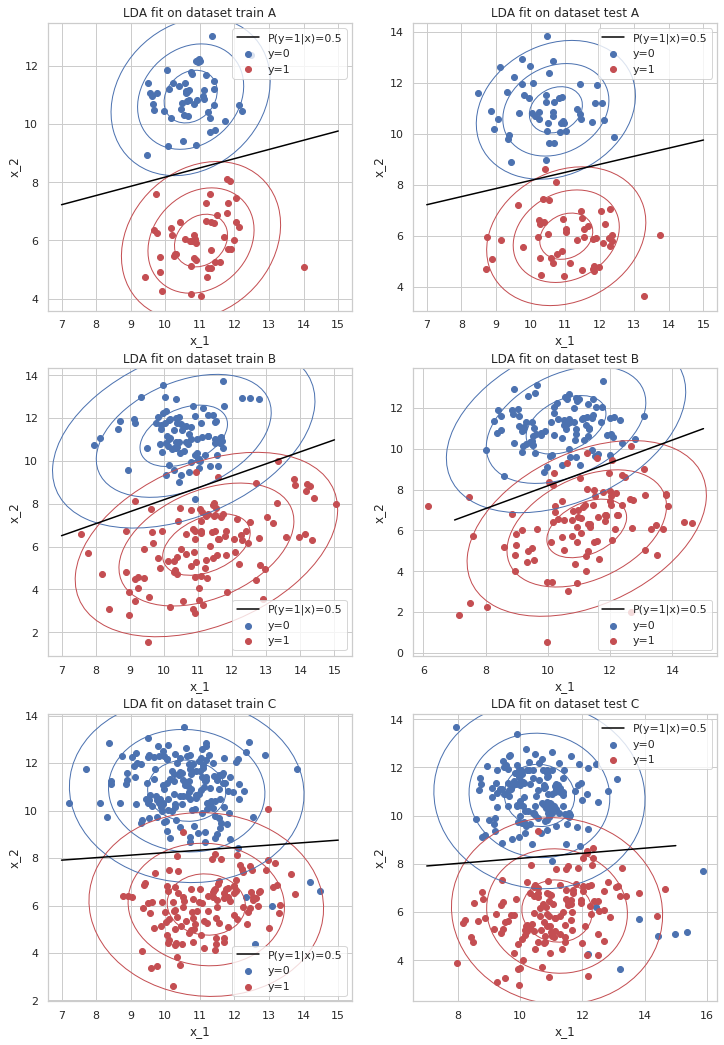

In [3]:
_, ax = plt.subplots(3, 2, figsize=(12, 18))
colors = ['b', 'r']
verbose = True

for idx, dataset in enumerate(['A', 'B', 'C']):
    # *********************** #
    # ***** Load Data ******* #
    # *********************** #
    df_train = pd.read_csv("data/train{}".format(dataset), sep=" ", header=None)
    df_test = pd.read_csv("data/test{}".format(dataset), sep=" ", header=None)

    X_train, y_train = df_train.iloc[:, :2].values, df_train.iloc[:, 2].values
    X_test, y_test = df_test.iloc[:, :2].values, df_test.iloc[:, 2].values

    # *************************** #
    # ***** Fit LDA model ******* #
    # *************************** #    
    mu0, mu1, shared_cov, pi = fit_LDA(X_train, y_train)
    if verbose:
        print('Dataset {}\nmu0={}\nmu1={}\nshared_cov={}\npi={}\n'.format(dataset,
                                                                      mu0,
                                                                      mu1,
                                                                      shared_cov,
                                                                        pi))

    # *************************** #
    # ****** Plot results ******* #
    # *************************** #
    # Decision boundary
    w, b = generate_LDA_hyperplane(mu0, mu1, shared_cov, pi)
    x1 = np.linspace(7, 15, 50) 
    x2 = (-w[0] * x1 - b) / w[1]
    
    # Confidence ellipse calculus
    eigen_values, eigen_vectors = np.linalg.eig(shared_cov)
    eigen_values = np.sqrt(eigen_values)
        
    for idx_bis, (X, y, name) in enumerate(zip([X_train, X_test], 
                                               [y_train, y_test],
                                               ['train', 'test'])):
        
        # Plot points
        for y_val in [0, 1]:
            ax[idx, idx_bis].scatter(X[np.where(y==y_val), 0], 
                        X[np.where(y==y_val), 1], c=colors[y_val], label='y={}'.format(y_val))
            
        # Plot decision boundary
        ax[idx, idx_bis].plot(x1, x2, c='black', label='P(y=1|x)=0.5')
        
        # Plot confidence ellipses:
        # https://stackoverflow.com/questions/20126061/creating-a-confidence-ellipses-in-a-sccatterplot-using-matplotlib
        for j in range(1, 4):
            for c, mu in enumerate([mu0, mu1]):
                ell = Ellipse(xy=(mu[0], mu[1]),
                              width=eigen_values[0]*j*2, height=eigen_values[1]*j*2,
                              angle=np.degrees(np.arctan2(*eigen_vectors[:,0][::-1])), color=colors[c])
                ell.set_facecolor('none')
                ax[idx, idx_bis].add_artist(ell)
                
        # Plot axis information: label, title, legend...
        ax[idx, idx_bis].set_xlabel('x_1')
        ax[idx, idx_bis].set_ylabel('x_2')
        ax[idx, idx_bis].set_title('LDA fit on dataset {} {}'.format(name, dataset))
        ax[idx, idx_bis].legend()
    
plt.show()

## 2. Logistic regression

In [4]:
def logistic_sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_logistic_regression_bias(X, w, b):
    return logistic_sigmoid(np.dot(X, w) + b)

def predict_logistic_regression(X, w):
    return logistic_sigmoid(np.dot(X, w))

def logistic_loss(X, w, y):
    y_pred = logistic_sigmoid(np.dot(X, w))
    return - np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))

def backtracking_line_search(X, w, y, newton_step, newton_decrement, alpha=0.00001, beta=0.9):
    t = 1
    diff = logistic_loss(X, w + t * newton_step, y) - (logistic_loss(X, w, y) - alpha * t * newton_decrement)
    while diff > 0:
        t *= beta   
        diff = logistic_loss(X, w + t * newton_step, y) - (logistic_loss(X, w, y) - alpha * t * newton_decrement)
        if diff < 1e-16:
            break
    return t   

def fit_logistic_regression(X, y, nmax=10, eps = 1e-1, verbose=False):    
    w = np.zeros(X.shape[1] + 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    
    for i in range(nmax):          
        y_pred = predict_logistic_regression(X, w)
        
        gradient = np.dot(X.T, y_pred-y)
        R = np.diag(y_pred * (1 - y_pred))
        
        hessian = np.dot(X.T, np.dot(R, X))
        hessian_inv = np.linalg.inv(hessian)
        
        newton_step = - np.dot(hessian_inv, gradient)
        newton_decrement = - np.dot(gradient.T, newton_step)
        
        # Line search
        t = backtracking_line_search(X, w, y, newton_step, newton_decrement)
        
        # Update
        w = w + t * newton_step
        if newton_decrement / 2 <= eps:
            break
        if verbose:
            print("iter: {} | loss: {}".format(i, logistic_loss(X, w, y)))
    return w[1:], w[0]

Dataset A - Parameters learnt are:
w=[ 1.99741455 -6.28103619]
b=32.286741868180606

Dataset B - Parameters learnt are:
w=[ 1.78680291 -3.60962063]
b=13.070315349693127

Dataset C - Parameters learnt are:
w=[-0.27663501 -1.91368936]
b=18.79942345729872



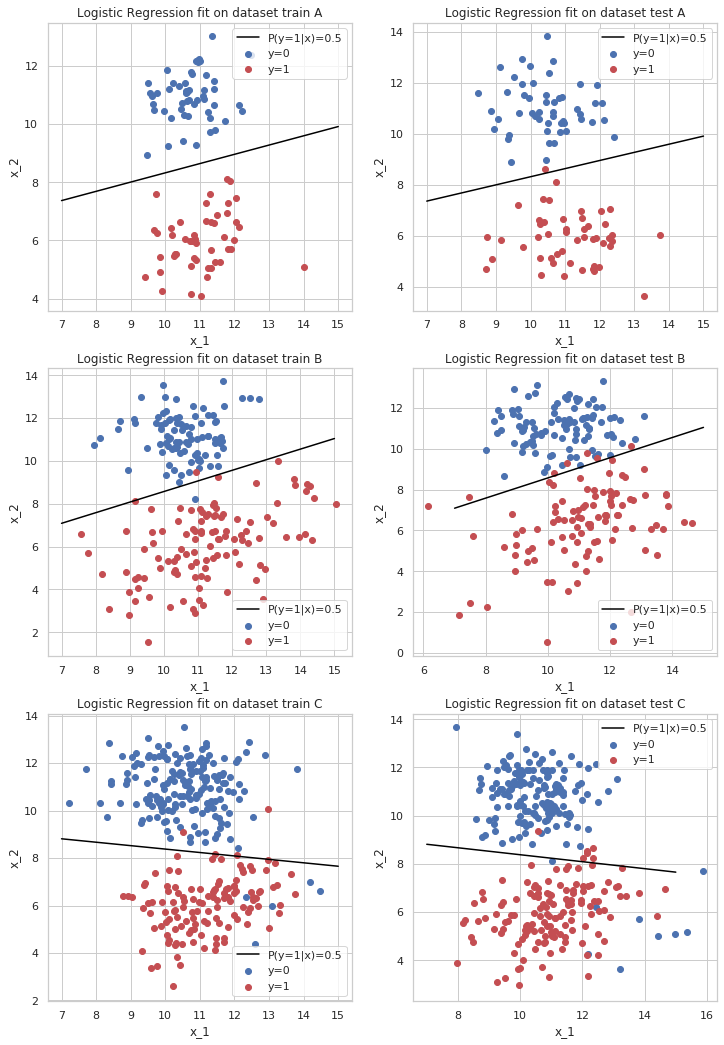

In [5]:
_, ax = plt.subplots(3, 2, figsize=(12, 18))
verbose = True

for idx, dataset in enumerate(['A', 'B', 'C']):
    # *********************** #
    # ***** Load Data ******* #
    # *********************** #
    df_train = pd.read_csv("data/train{}".format(dataset), sep=" ", header=None)
    df_test = pd.read_csv("data/test{}".format(dataset), sep=" ", header=None)

    X_train, y_train = df_train.iloc[:, :2].values, df_train.iloc[:, 2].values
    X_test, y_test = df_test.iloc[:, :2].values, df_test.iloc[:, 2].values

    # *************************** #
    # ***** Fit LG model ******** #
    # *************************** # 
    w, b = fit_logistic_regression(X_train, y_train)
    if verbose:
        print('Dataset {} - Parameters learnt are:\nw={}\nb={}\n'.format(dataset, w, b))
        

    # *************************** #
    # ****** Plot results ******* #
    # *************************** #
    x1 = np.linspace(7, 15, 50) 
    x2 = (-w[0] * x1 - b) / w[1]
    for idx_bis, (X, y, name) in enumerate(zip([X_train, X_test], 
                                               [y_train, y_test],
                                               ['train', 'test'])):
        
        # Plot points
        for y_val in [0, 1]:
            ax[idx, idx_bis].scatter(X[np.where(y==y_val), 0], 
                                     X[np.where(y==y_val), 1], 
                                     c=colors[y_val], 
                                     label='y={}'.format(y_val))
        # Plot decision boundary
        ax[idx, idx_bis].plot(x1, x2, c='black', label='P(y=1|x)=0.5')
        
        # Plot axis information: label, title, legend...
        ax[idx, idx_bis].set_xlabel('x_1')
        ax[idx, idx_bis].set_ylabel('x_2')
        ax[idx, idx_bis].set_title('Logistic Regression fit on dataset {} {}'.format(name, dataset))
        ax[idx, idx_bis].legend()
plt.show()

## 3. Linear regression

In [6]:
def mse(y, y_pred):
    return np.linalg.norm(y-y_pred, 2)

def predict_linear_regression(X, w, b):
    return np.dot(X, w) + b

def fit_linear_regression(X, y, verbose=False):    
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    pseudo_inverse = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    w = np.dot(pseudo_inverse, y)
    return w[1:], w[0]

Dataset A - Parameters learnt are:
w=[ 0.05582438 -0.17636636]
b=1.3834577395037304

Dataset B - Parameters learnt are:
w=[ 0.08258172 -0.14757517]
b=0.8824998417113077

Dataset C - Parameters learnt are:
w=[ 0.01675461 -0.15897174]
b=1.6401520597430355



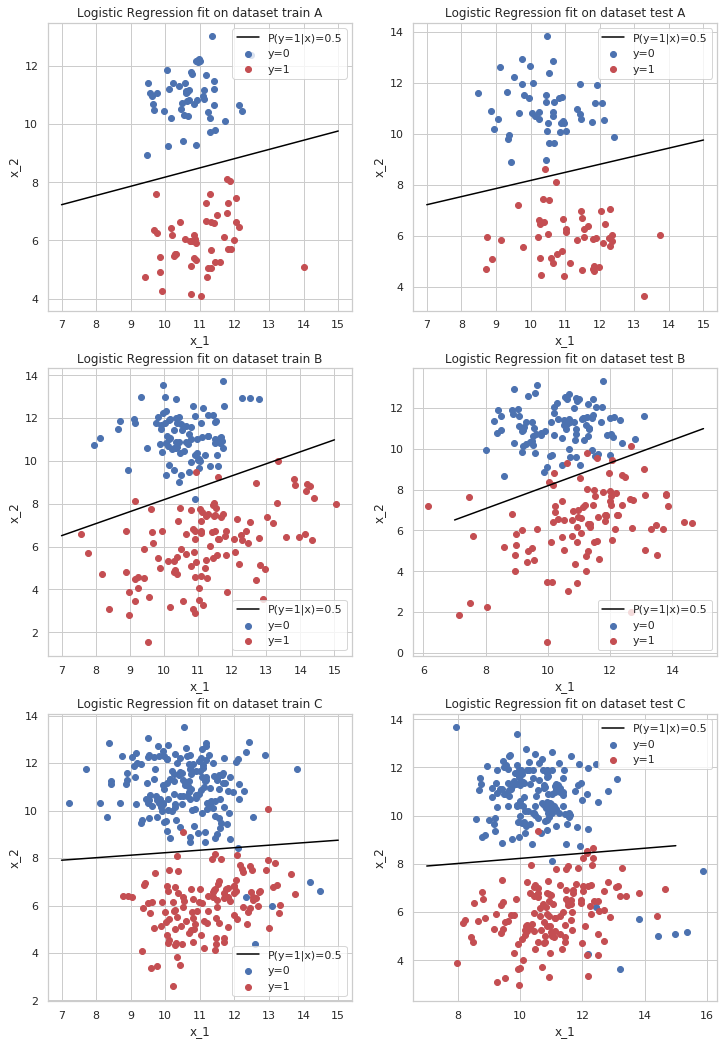

In [7]:
_, ax = plt.subplots(3, 2, figsize=(12, 18))
verbose = True

for idx, dataset in enumerate(['A', 'B', 'C']):
    # *********************** #
    # ***** Load Data ******* #
    # *********************** #
    df_train = pd.read_csv("data/train{}".format(dataset), sep=" ", header=None)
    df_test = pd.read_csv("data/test{}".format(dataset), sep=" ", header=None)

    X_train, y_train = df_train.iloc[:, :2].values, df_train.iloc[:, 2].values
    X_test, y_test = df_test.iloc[:, :2].values, df_test.iloc[:, 2].values

    # *************************** #
    # ***** Fit LG model ******** #
    # *************************** # 
    w, b = fit_linear_regression(X_train, y_train)
    if verbose:
        print('Dataset {} - Parameters learnt are:\nw={}\nb={}\n'.format(dataset, w, b))
        

    # *************************** #
    # ****** Plot results ******* #
    # *************************** #
    x1 = np.linspace(7, 15, 50) 
    x2 = (-w[0] * x1 - b + 0.5) / w[1]
    for idx_bis, (X, y, name) in enumerate(zip([X_train, X_test], 
                                               [y_train, y_test],
                                               ['train', 'test'])):
        
        # Plot points
        for y_val in [0, 1]:
            ax[idx, idx_bis].scatter(X[np.where(y==y_val), 0], 
                                     X[np.where(y==y_val), 1], 
                                     c=colors[y_val], 
                                     label='y={}'.format(y_val))
        # Plot decision boundary
        ax[idx, idx_bis].plot(x1, x2, c='black', label='P(y=1|x)=0.5')
        
        # Plot axis information: label, title, legend...
        ax[idx, idx_bis].set_xlabel('x_1')
        ax[idx, idx_bis].set_ylabel('x_2')
        ax[idx, idx_bis].set_title('Logistic Regression fit on dataset {} {}'.format(name, dataset))
        ax[idx, idx_bis].legend()
plt.show()

### 4. Application

In [8]:
def accuracy(y, y_pred):
    return ((y_pred >= 0.5).astype(int) == y).mean() * 100

In [9]:
for idx, dataset in enumerate(['A', 'B', 'C']):
    df_train = pd.read_csv("data/train{}".format(dataset), sep=" ", header=None)
    X_train, y_train = df_train.iloc[:, :2].values, df_train.iloc[:, 2].values
    X_test, y_test = df_test.iloc[:, :2].values, df_test.iloc[:, 2].values

    print('Dataset {}'.format(dataset))

    # ================================
    # ============  LDA  =============
    # ================================
    mu1, mu2, shared_cov, pi = fit_LDA(X_train, y_train)
    w, b = generate_LDA_hyperplane(mu1, mu2, shared_cov, pi)
    y_pred = predict_logistic_regression_bias(X_train, w, b)
    train_acc = accuracy(y_train, y_pred)       
    y_pred = predict_logistic_regression_bias(X_test, w, b)
    test_acc = accuracy(y_test, y_pred)
    print('LDA                 | train_acc: {:0.2f} | test_acc: {:0.2f}'.format(train_acc, test_acc))
      
    # ================================
    # ====== Logistic Regression =====
    # ================================
    w, b = fit_logistic_regression(X_train, y_train)
    y_pred = predict_logistic_regression_bias(X_train, w, b)
    train_acc = accuracy(y_train, y_pred)       
    y_pred = predict_logistic_regression_bias(X_test, w, b)
    test_acc = accuracy(y_test, y_pred)
    print('Logistic Regression | train_acc: {:0.2f} | test_acc: {:0.2f}'.format(train_acc, test_acc))

    # ================================
    # ======  Linear Regression  =====
    # ================================
    w, b = fit_linear_regression(X_train, y_train)
    y_pred = predict_linear_regression(X_train, w, b)
    train_acc = accuracy(y_train, y_pred)       
    y_pred = predict_linear_regression(X_test, w, b)
    test_acc = accuracy(y_test, y_pred)
    print('Linear Regression   | train_acc: {:0.2f} | test_acc: {:0.2f}\n'.format(train_acc, test_acc))

Dataset A
LDA                 | train_acc: 100.00 | test_acc: 96.33
Logistic Regression | train_acc: 100.00 | test_acc: 96.33
Linear Regression   | train_acc: 100.00 | test_acc: 96.33

Dataset B
LDA                 | train_acc: 98.00 | test_acc: 96.00
Logistic Regression | train_acc: 99.00 | test_acc: 95.67
Linear Regression   | train_acc: 98.00 | test_acc: 96.00

Dataset C
LDA                 | train_acc: 97.33 | test_acc: 96.00
Logistic Regression | train_acc: 97.00 | test_acc: 95.33
Linear Regression   | train_acc: 97.33 | test_acc: 96.00



On dataset A, all the models perform the same, there is a slight overfitting oversall since the test accuracy drops a bit (from 100 % to 96.33 %).

On dataset B, logistic regression is a bit worse, due to slight overfitting again: the test accuracy is 95.67 % compared to 96 % from LDA and Linear regression.

On dataset C, LDA and linear regression have the same performance 96% while logistic regression is a bit lower with 95.33 %.

## 2- Gaussian mixture models and EM

### 1. Math

$$ X_0 \sim \Sigma^K_{k=1} \pi_k N(\mu_k, \Sigma_k) $$

with $\pi_k \in [0, 1], \Sigma^K_{k=1}\pi_k = 1, X_0 \in \mathbb{R}^p$. We are provided with a realisation $(x_1, \dots,x_n)$ of a random sample of size $n$.

**EM.**

Given initial parameters $\mu_k$, $\Sigma_k$, $\pi_k$ (initialized by k-mean clustering).

**E-step:**

We evaluate the posterior distribution of the latent variables $p(Z|X_n, \theta)$ where $\theta = \{ \mu_k, \Sigma_k, \pi_k | k=1,\dots,K \}$

We have:

\begin{align}
p(Z|X_n, \theta) &= \frac{p(X_n | Z, \theta)p(Z | \theta)}{P(X_n | \theta)} \\
                 &= \frac{p(X_n | Z, \theta)p(Z | \theta)}{\sum P(X_n | Z, \theta)P(Z | \theta)} \\
                 &= \frac{\prod_n \prod_k(\pi_k N(X_n | \mu_k, \Sigma_k))^{z_{nk}}}{\sum_j \pi_jN(x_n | \mu_j, \Sigma_j)} 
\end{align}

The expectation of $z_{nk}$ can be written:

\begin{align}
Ez_{nk} &= \sum_{\bar{z}_{nk}} \bar{z}_{nk} p(z_{nk}=\bar{z}_{nk}|X_n, \theta) \\
        &= \frac{\pi_k N(X_n | \mu_k, \Sigma_k)}{\sum_j \pi_jN(x_n |\sum_j \mu_j, \Sigma_j)}
\end{align}

**M-step:**

We evaluate the expectation of the complete data log likelihood under the posterior distribution of $z_{nk}$ and we maximize its parameters.

The complete data log likelihood is:

$$ P(X_n, Z | \mu, \Sigma, \pi) = \prod_n \prod_k(\pi_k N(X_n | \mu_k, \Sigma_k))^{z_{nk}} $$

The log complete data likelihood is:

$$ logP(X_n, Z | \mu, \Sigma, \pi) = \sum_n \sum_k(z_{nk} log\pi_k + z_{nk} logN(X_n | \mu_k, \Sigma_k)) $$

The expectation of the log complete data log likelihood under the posterior distribution of $z_{nk}$:

\begin{align}
ElogP(X_n, Z | \mu, \Sigma, \pi) = \sum_n \sum_k(Ez_{nk} log\pi_k + Ez_{nk} logN(X_n | \mu_k, \Sigma_k))
\end{align}

Since the $\pi_k$ are subject to $\sum \pi_k = 1$, we maximize the Lagrangian w.r.t. $\pi_k$. 

\begin{align}
\partial_{\pi_k} ElogP(X_n, Z | \mu, \Sigma, \pi) + \partial_{\pi_k} \lambda (\sum_k \pi_k - 1) &=  \sum_n Ez_{nk} \partial_{\pi_k} log\pi_k + \lambda \\
                                       &= \sum_n Ez_{nk} \frac{1}{\pi_k} + \lambda \\
                                       &= 0
\end{align}

We multiply both side  by $\pi_k$:

$$ \sum_n Ez_{nk} + \lambda\pi_k = 0$$

We sum over $k$:

$$ \sum_n \sum_k Ez_{nk} + \sum_k \lambda\pi_k = 0$$

We obtain:

$$ \lambda = - \sum_n \sum_k Ez_{nk} = - n$$

We swap $\lambda$ and $-n$:

$$\sum_n Ez_{nk} \frac{1}{\pi_k} - n = 0$$

We have:

$$ \pi_k = \frac{\sum_n Ez_{nk}}{n} = \frac{N_k}{n}$$

Afterwards, we set the derivative w.r.t. $\mu_k$ to zero:

\begin{align}
\nabla_{\mu_k} ElogP(X_n, Z | \mu, \Sigma, \pi) &= \nabla_{\mu_k} \sum_n \sum_k(Ez_{nk} log\pi_k + Ez_{nk} logN(X_n | \mu_k, \Sigma_k)) \\
&= \nabla_{\mu_k} \sum_n Ez_{nk} logN(X_n | \mu_k, \Sigma_k)) \\
&= \nabla_{\mu_k} \sum_n Ez_{nk} \frac{1}{2} (x_n-\mu_k)^T\Sigma_k^{-1}(x_n-\mu_k)  + cst\\
&= \sum_n Ez_{nk} \Sigma_k^{-1}(x_n-\mu_k)\\
&= 0
\end{align}

We deduce:

$$ \mu_k = \sum_n \frac{1}{N_k}Ez_{nk} (x_n)$$

And finally, we set the derivative w.r.t. $\Sigma_k$ to zero:

\begin{align}
\nabla_{\Sigma_k} ElogP(X_n, Z | \mu, \Sigma, \pi) &= \nabla_{\Sigma_k} \sum_n \sum_k(Ez_{nk} log\pi_k + Ez_{nk} logN(X_n | \mu_k, \Sigma_k)) \\
&= \nabla_{\Sigma_k} \sum_n Ez_{nk} logN(X_n | \mu_k, \Sigma_k)) \\
&= \nabla_{\Sigma_k} \sum_n Ez_{nk}( \frac{1}{2} (x_n-\mu_k)^T\Sigma_k^{-1}(x_n-\mu_k) - \frac{1}{2} log(|\Sigma_k|) + cst)\\
&= 0
\end{align}

Same computation than with LDA, we obtain:

$$ \Sigma_k = \sum_n \frac{1}{N_k}Ez_{nk} (x_n-\mu_k)^T(x_n-\mu_k)$$

### 2. Implementation

In [10]:
def kmean_clustering(X, N, K=3, nmax=3):
    distortion = np.zeros((N, K))
    mu = X[np.random.choice(N, 3, replace=False)].copy()
    for _ in range(nmax):
        for k in range(K):
            distortion[:, k] = np.linalg.norm(X - mu[k], 2, axis=1)
        clusters = distortion.argmin(axis=1)
        for k in range(K):
            mu[k, : ] = X[np.where(clusters == k)].mean(axis=0)
    return mu, clusters

In [11]:
def initialize_EM(K=3):
    N = X.shape[0]
    D = X.shape[1]
    
    # update mu
    mu, clusters = kmean_clustering(X, N, K)
    _, counts = np.unique(clusters, return_counts=True)
    # update pi
    pi = counts / counts.sum()
    # update cov
    cov = np.ones((K, D, D))
    for k in range(K):
        muk = mu[k]
        Xk = X[np.where(clusters==k)]
        cov[k, :, :] = np.cov(Xk.T) + np.eye(D) * 1e-4
    return mu, cov, pi
    
def E_step(X, K, pi, Gaussians):
    N = X.shape[0]
    D = X.shape[1]
    
    resp = np.zeros((N, K))
    for k in range(K):
        resp[:, k] = (pi * Gaussians)[:,k] / (pi * Gaussians).sum(axis=1)
    return resp
    
def M_step(X, K, resp):
    N = X.shape[0]
    D = X.shape[1]
    
    Nk = resp.sum(axis=0)
    
    # update mu
    for k in range(K):
        if Nk[k] != 0:
            mu[k] = (1/Nk[k]) * np.dot(X.T, resp[:,k])
            
    # update pi
    pi = Nk / N
    
    # update cov
    cov = np.zeros((K, D, D))
    for k in range(K):
        if Nk[k] != 0:
            cov[k,:, :] = np.dot(np.multiply((X - mu[k]).T, resp[:, k ]),  X-mu[k]) / Nk[k] + np.eye(D) * 1e-4
        
    return mu, pi, cov, Nk
    
def log_likelihood(pi, Normal):
    return np.log((pi * Normal).sum(axis=1)).sum(axis=0)

def compute_gaussians(X, mu, cov):
    
    N = X.shape[0]
    D = X.shape[1]
    Gaussians = np.zeros((N, K))
    
    for k in range(K):
        for n in range(N):
            Gaussians[n, k] = multivariate_normal.pdf(X[n, :], mu[k], cov[k]) 
    return Gaussians

In [12]:
import pyreadr
from scipy.stats import multivariate_normal

## *************  ##
#  Read the data  #
# *************** #

result = pyreadr.read_r('data/decathlon.RData')
X = result["X"].values
N = X.shape[0]
D = X.shape[1]

# Parameters

K = 3
eps = 1e-5
nmax = 50

# EM algorithm

mu, cov, pi = initialize_EM(K)

Gaussians = compute_gaussians(X, mu, cov)
        
old_l = log_likelihood(pi, Gaussians)

n_iter = 0
convergence_criterion = False

while not convergence_criterion and n_iter < nmax:
    # E step: compute responsabilities
    resp = E_step(X, K, pi, Gaussians)
    
    # M step: update parameters
    mu, pi, cov, Nk = M_step(X, K, resp)
    
    # Compute Gaussian
    Gaussians = compute_gaussians(X, mu, cov)
    # likelihood
    l = np.log((pi * Gaussians).sum(axis=1)).sum(axis=0)
    
    # Check for converge
    if n_iter != 0:
        convergence_criterion = np.abs(l-old_l) <= eps
        print("n_iter: {} | delta_likelihood : {}".format(n_iter, np.abs(l-old_l)))
    old_l = l
    n_iter += 1

n_iter: 1 | delta_likelihood : 0.00279031315562861
n_iter: 2 | delta_likelihood : 0.0011842573160265601
n_iter: 3 | delta_likelihood : 0.0004909857063353229
n_iter: 4 | delta_likelihood : 0.00020382056771950374
n_iter: 5 | delta_likelihood : 8.470072270938545e-05
n_iter: 6 | delta_likelihood : 3.521716627119531e-05
n_iter: 7 | delta_likelihood : 1.4646317765709682e-05
n_iter: 8 | delta_likelihood : 6.0919428506167606e-06


### 3. Application

We project the data into 2D spaces with PCA to provide visualization.

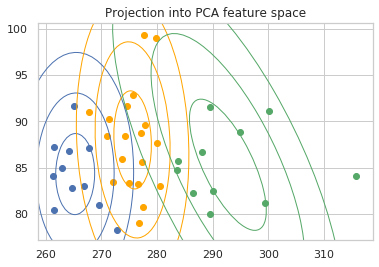

In [13]:
_, ax = plt.subplots(1)
colors = ['b', 'orange', 'g']

n = X.shape[0]

# Covar of our data
S = np.cov(X - X.mean(axis=0), rowvar = False)*((n-1)/n)
lambd, principal_axes = np.linalg.eig(S)
# Principal component analysis
C = np.dot(X, principal_axes[:,:2]) 
C1 = C[:,0]
C2 = C[:,1]

# Title
plt.title("Projection into PCA feature space")
for k in range(K):
    # get points from cluster k
    idx = np.where(resp.argmax(axis=1) == k)[0]
    plt.scatter(C1[idx], C2[idx], c=colors[k])
    
    # Axis of the ellipse
    eigen_values, eigen_vectors = np.linalg.eig(cov[k])
    eigen_values = np.sqrt(eigen_values)
    eigen_values = eigen_values[:2]
    # Projection into 2D PCA feature space
    eigen_vectors = np.dot(eigen_vectors[:2], principal_axes[:,:2])
    
    # Center of the ellipse, projected into 2D PCA feature space
    mu_p = np.dot(mu[k], principal_axes[:,:2])
    
    # Plot ellipse
    for j in range(1, 4):
        ell = Ellipse(xy=(mu_p[0], mu_p[1]),
                      width=eigen_values[0]*j*2, height=eigen_values[1]*j*2,
                      angle=np.degrees(np.arctan2(*eigen_vectors[:,0][::-1])), color=colors[k])
        ell.set_facecolor('none')
        ax.add_artist(ell)

In [16]:
clusters_idx = []
for k in range(K):
    cluster = np.where(resp.argmax(axis=1)==k)[0]
    clusters_idx.append(cluster)
    print("cluster : {} | {}".format(k, cluster))

cluster : 0 | [ 6  8 11 16 19 25 27 29 31 34 36]
cluster : 1 | [ 3  4  5 10 13 14 15 17 18 20 21 22 24 26 28 30 32 37 39]
cluster : 2 | [ 0  1  2  7  9 12 23 33 35 38 40]


In [17]:
result['X'].groupby(resp.argmax(axis=1)).mean()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,11.053636,7.191818,14.109091,1.956364,49.123636,14.593636,42.973636,4.650909,57.445455,266.807273
1,10.935789,7.352105,14.698421,1.989474,49.358421,14.548947,44.555263,4.777895,60.111053,277.301053
2,11.050000,7.169091,14.462727,1.975455,50.554545,14.716364,45.280909,4.847273,56.088182,294.220000


Cluster 0: Lowest performers

Cluster 1: Highest value in "Javeline", "shot put": **throwers**.

Cluster 2: Highest value in "110m.hurdle" "1500m" and "400m" on average: **Runners**.